## Take a bunch of runs and re-do them with 

In [1]:
from matplotlib import rc
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import os
import xarray as xr
import subprocess
import matplotlib.pyplot as plt
import shutil
os.chdir("/home/149/ab8992/bottom_near_inertial_waves/automate_experiments")

import autolib as al
from dask.distributed import Client
client = Client()
client

<Client: 'tcp://127.0.0.1:46687' processes=7 threads=28, memory=112.00 GiB>

# Notebook to re-run our experiments in June. 

Want to create a master notebook that generates all of the common forcings, and the perterbation values for each experiment. Write a function that takes common & perterbation fields

| Experiment | Common | Perterbed|
| --- |---|--- |
| Topo Height | windstress | topog |
| Topo Width | Windstress | topog  |
| Forcing Width | topog | Windstress  |
| Strat | Windstress | topog|
| Duration | topog | Windstress |
| Strength | topog | Windstress |

Experiment name format:

| Type | Format |
|---|---|
| experiments | `june_perterb_hill_nlayer` |
|common topog  | `june_common_hill_nlayer`  |
|common wind | `june_common_wind_nlayer`  |


In [31]:

## Perterbation values
## strat variables 
strats = [0.25,0.2,0.5,0.75,1,1.5,2,3,4,0.001,0.01,6]

## Height
heights = [10,20,50,80,120,150,225,275,350,450,600,750,1000,1250,1500,2000]

## Duration
durations = [0.5,1,2,3,4,5,6,8.7,10] ## Note! Will need to modify the amount of time that model runs for with forcing in this case

## Strength
strengths = [0.1,0.2,0.5,0.75,1,1.25,1.5,2,3,4,10]

## Topog Width
widths = [4,8,12.5,16,25,35,50,100,200] 

## Forcing Width
forcing_widths = [25,50,75,100,150,175,200,300,500,800,1000]


## Make a dictionary of all 2layer experiments for now 

In [32]:
r2 = {}
h2 = {}

def openexpt(pert,values,topo,layers = 2):
    out = {}
    for i in values:
        try:
            out[i] = xr.open_dataset(f"/g/data/v45/ab8992/bottom_iwbs/juneresults/june_{pert}_{topo}_{layers}layer_{pert}-{i}")
        except:
            print(f"can't find june_{pert}_{topo}_{layers}layer_{pert}-{i}")
    return out

r2["height"] = openexpt("height",heights,"ridge",layers=2)
r2["strat"] = openexpt("strat",strats,"ridge",layers=2)
r2["duration"] = openexpt("duration",durations,"ridge",layers=2)
r2["strength"] = openexpt("strength",strengths,"ridge",layers=2)
r2["width"] = openexpt("width",widths,"ridge",layers=2)
r2["forcing_latwidth"] = openexpt("forcing_latwidth",forcing_widths,"ridge",layers=2)

h2["height"] = openexpt("height",heights,"hill",layers=2)
h2["strat"] = openexpt("strat",strats,"hill",layers=2)
h2["duration"] = openexpt("duration",durations,"hill",layers=2)
h2["strength"] = openexpt("strength",strengths,"hill",layers=2)
h2["width"] = openexpt("width",widths,"hill",layers=2)
h2["forcing_latwidth"] = openexpt("forcing_latwidth",forcing_widths,"hill",layers=2)

## Plot each experiment. Conversion and total energy side by side

In [33]:
import matplotlib
font = {'family' : 'serif',
        'weight':'normal',
        'size'   : 12}
matplotlib.rc('font', **font)

def get_axes(data):
    yww,ytot,yratio = np.zeros(0),np.zeros(0),np.zeros(0)

    for i in data:
        yww = np.append(yww,data[i].wind_work.values)
        ytot = np.append(ytot,(data[i].EF_zonal.isel(xi = 0) - data[i].EF_zonal.isel(xi = 1)).integrate("time").values)
    yratio = ytot/yww

    return yww,ytot,yratio

## HEIGHT

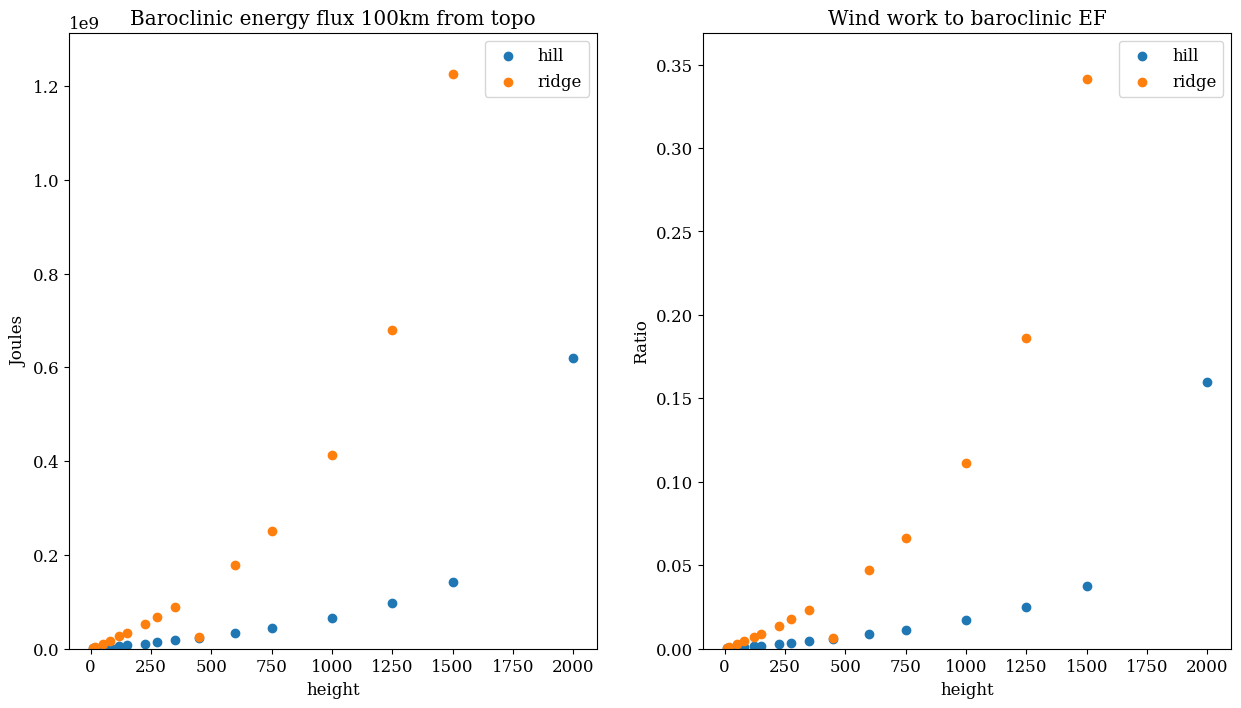

In [34]:
fig,ax = plt.subplots(1,2,figsize = (15,8))

runs = np.array(heights)
var = "height"

for i in runs:
    # print(run)
    hww,htot,hratio = get_axes(h2[var])
    rww,rtot,rratio = get_axes(r2[var])

ax[0].set_title("Baroclinic energy flux 100km from topo")
ax[0].set_ylabel("Joules")
ax[1].set_ylabel("Ratio")
ax[0].set_xlabel(var)
ax[1].set_xlabel(var)


ax[1].set_title("Wind work to baroclinic EF")
ax[0].scatter(runs,htot,label = "hill")
ax[1].scatter(runs,hratio,label = "hill")
ax[0].scatter(runs,rtot,label = "ridge")
ax[1].scatter(runs,rratio,label = "ridge")

ax[0].set_ylim(0,None)
ax[1].set_ylim(0,None)
ax[0].legend()
ax[1].legend()

## Duration

In [35]:
fig,ax = plt.subplots(1,2,figsize = (15,8))

runs = np.array(durations)
var = "duration"

for i in runs:
    # print(run)
    hww,htot,hratio = get_axes(h2[var])
    rww,rtot,rratio = get_axes(r2[var])

ax[0].set_title("Baroclinic energy flux 100km from topo")
ax[0].set_ylabel("Joules")
ax[1].set_ylabel("Ratio")
ax[0].set_xlabel(var)
ax[1].set_xlabel(var)


ax[1].set_title("Wind work to baroclinic EF")
ax[0].scatter(runs,htot,label = "hill")
ax[1].scatter(runs,hratio,label = "hill")
ax[0].scatter(runs,rtot,label = "ridge")
ax[1].scatter(runs,rratio,label = "ridge")

ax[0].set_ylim(0,None)
ax[1].set_ylim(0,None)
ax[0].legend()
ax[1].legend()

Error in callback <function flush_figures at 0x14d61a7869d0> (for post_execute):


KeyboardInterrupt: 

## Forcing Width

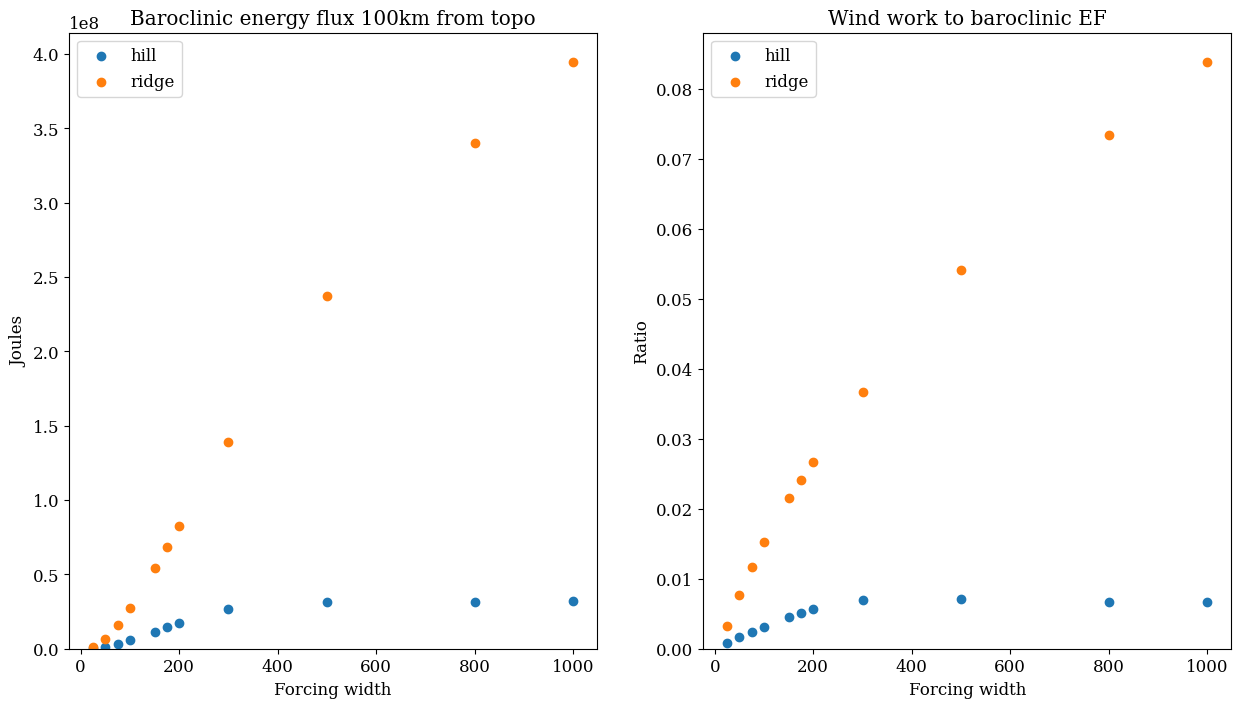

In [ ]:
fig,ax = plt.subplots(1,2,figsize = (15,8))

runs = np.array(forcing_widths)
var = "forcing_latwidth"

for i in runs:
    # print(run)
    hww,htot,hratio = get_axes(h2[var])
    rww,rtot,rratio = get_axes(r2[var])

ax[0].set_title("Baroclinic energy flux 100km from topo")
ax[0].set_ylabel("Joules")
ax[1].set_ylabel("Ratio")
ax[0].set_xlabel("Forcing width")
ax[1].set_xlabel("Forcing width")


ax[1].set_title("Wind work to baroclinic EF")
ax[0].scatter(runs,htot,label = "hill")
ax[1].scatter(runs,hratio,label = "hill")
ax[0].scatter(runs,rtot,label = "ridge")
ax[1].scatter(runs,rratio,label = "ridge")

ax[0].set_ylim(0,None)
ax[1].set_ylim(0,None)
ax[0].legend()
ax[1].legend()

## Stratification

/jobfs/89103699.gadi-pbs/ipykernel_1778935/868663747.py:13: RuntimeWarning: divide by zero encountered in divide
  yratio = ytot/yww
/jobfs/89103699.gadi-pbs/ipykernel_1778935/868663747.py:13: RuntimeWarning: divide by zero encountered in divide
  yratio = ytot/yww
/jobfs/89103699.gadi-pbs/ipykernel_1778935/868663747.py:13: RuntimeWarning: divide by zero encountered in divide
  yratio = ytot/yww
/jobfs/89103699.gadi-pbs/ipykernel_1778935/868663747.py:13: RuntimeWarning: divide by zero encountered in divide
  yratio = ytot/yww
/jobfs/89103699.gadi-pbs/ipykernel_1778935/868663747.py:13: RuntimeWarning: divide by zero encountered in divide
  yratio = ytot/yww
/jobfs/89103699.gadi-pbs/ipykernel_1778935/868663747.py:13: RuntimeWarning: divide by zero encountered in divide
  yratio = ytot/yww
/jobfs/89103699.gadi-pbs/ipykernel_1778935/868663747.py:13: RuntimeWarning: divide by zero encountered in divide
  yratio = ytot/yww
/jobfs/89103699.gadi-pbs/ipykernel_1778935/868663747.py:13: RuntimeWa

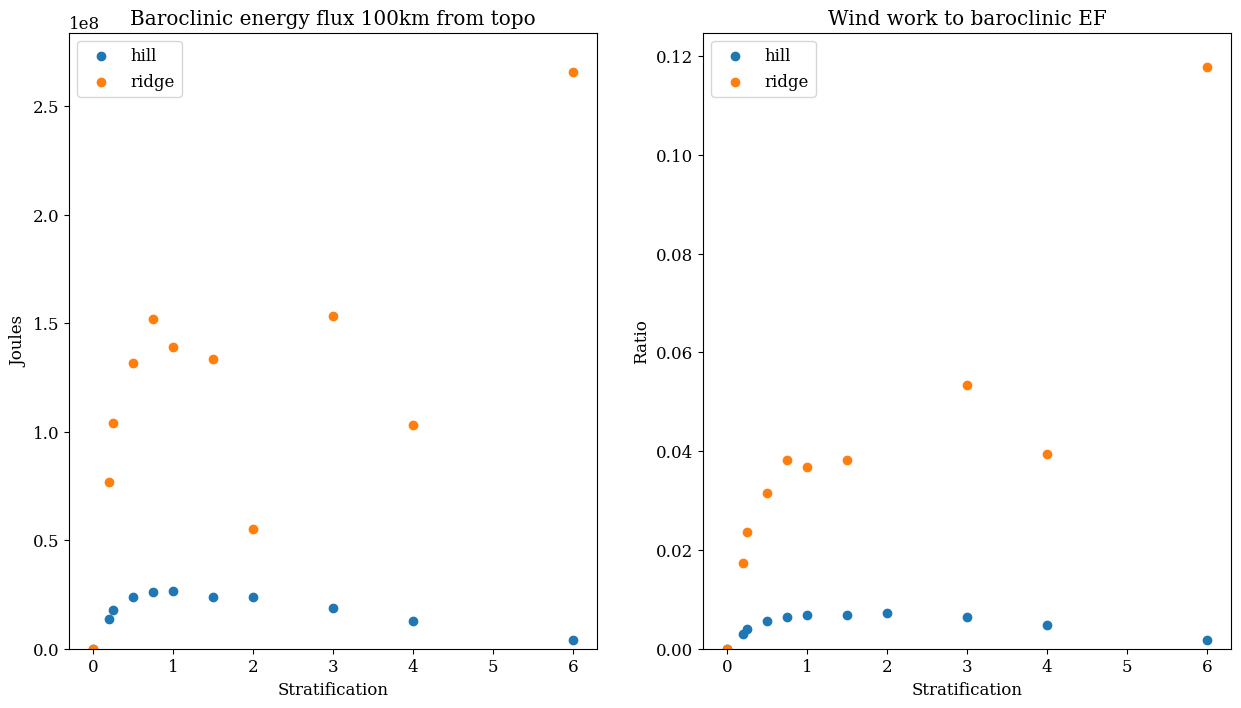

In [ ]:
fig,ax = plt.subplots(1,2,figsize = (15,8))

runs = np.array(strats)
var = "strat"

for i in runs:
    # print(run)
    hww,htot,hratio = get_axes(h2[var])
    rww,rtot,rratio = get_axes(r2[var])

ax[0].set_title("Baroclinic energy flux 100km from topo")
ax[0].set_ylabel("Joules")
ax[1].set_ylabel("Ratio")
ax[0].set_xlabel("Stratification")
ax[1].set_xlabel("Stratification")


ax[1].set_title("Wind work to baroclinic EF")
ax[0].scatter(runs,htot,label = "hill")
ax[1].scatter(runs,hratio,label = "hill")
ax[0].scatter(runs,rtot,label = "ridge")
ax[1].scatter(runs,rratio,label = "ridge")

ax[0].set_ylim(0,None)
ax[1].set_ylim(0,None)
ax[0].legend()
ax[1].legend()

## Topo Width

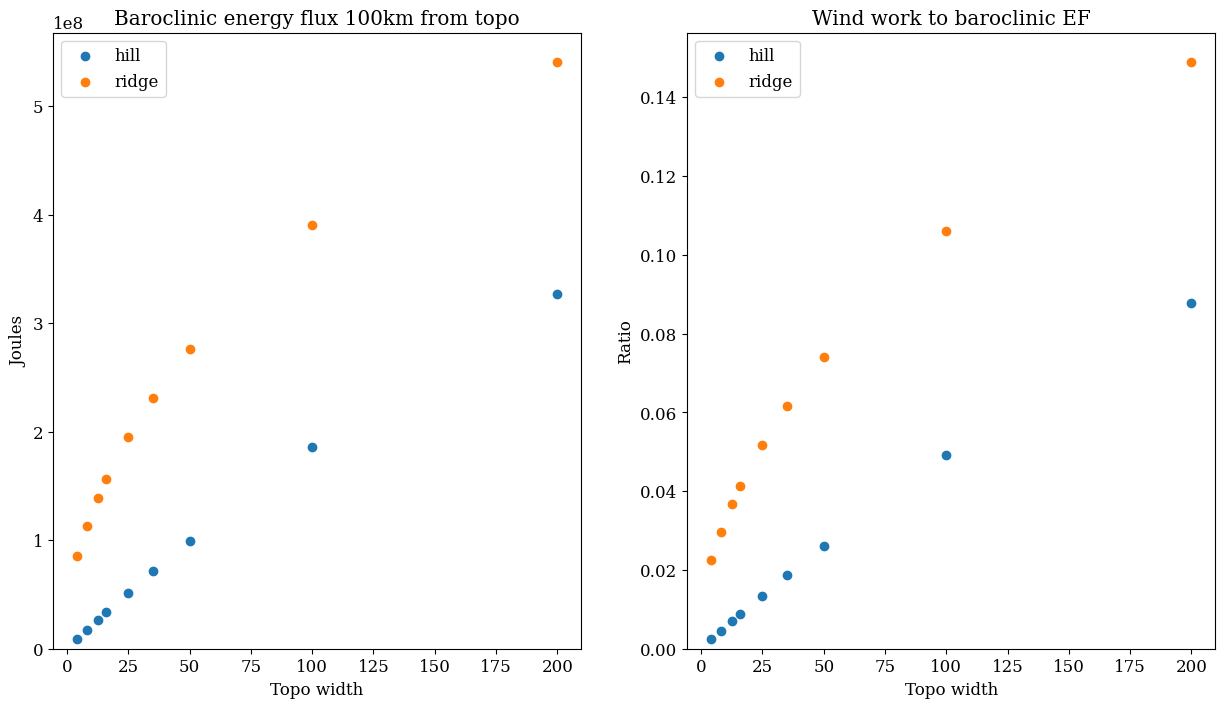

In [ ]:
fig,ax = plt.subplots(1,2,figsize = (15,8))

runs = np.array(widths)
var = "width"

for i in runs:
    # print(run)
    hww,htot,hratio = get_axes(h2[var])
    rww,rtot,rratio = get_axes(r2[var])

ax[0].set_title("Baroclinic energy flux 100km from topo")
ax[0].set_ylabel("Joules")
ax[1].set_ylabel("Ratio")
ax[0].set_xlabel("Topo width")
ax[1].set_xlabel("Topo width")


ax[1].set_title("Wind work to baroclinic EF")
ax[0].scatter(runs,htot,label = "hill")
ax[1].scatter(runs,hratio,label = "hill")
ax[0].scatter(runs,rtot,label = "ridge")
ax[1].scatter(runs,rratio,label = "ridge")

ax[0].set_ylim(0,None)
ax[1].set_ylim(0,None)
ax[0].legend()
ax[1].legend()

## Strength

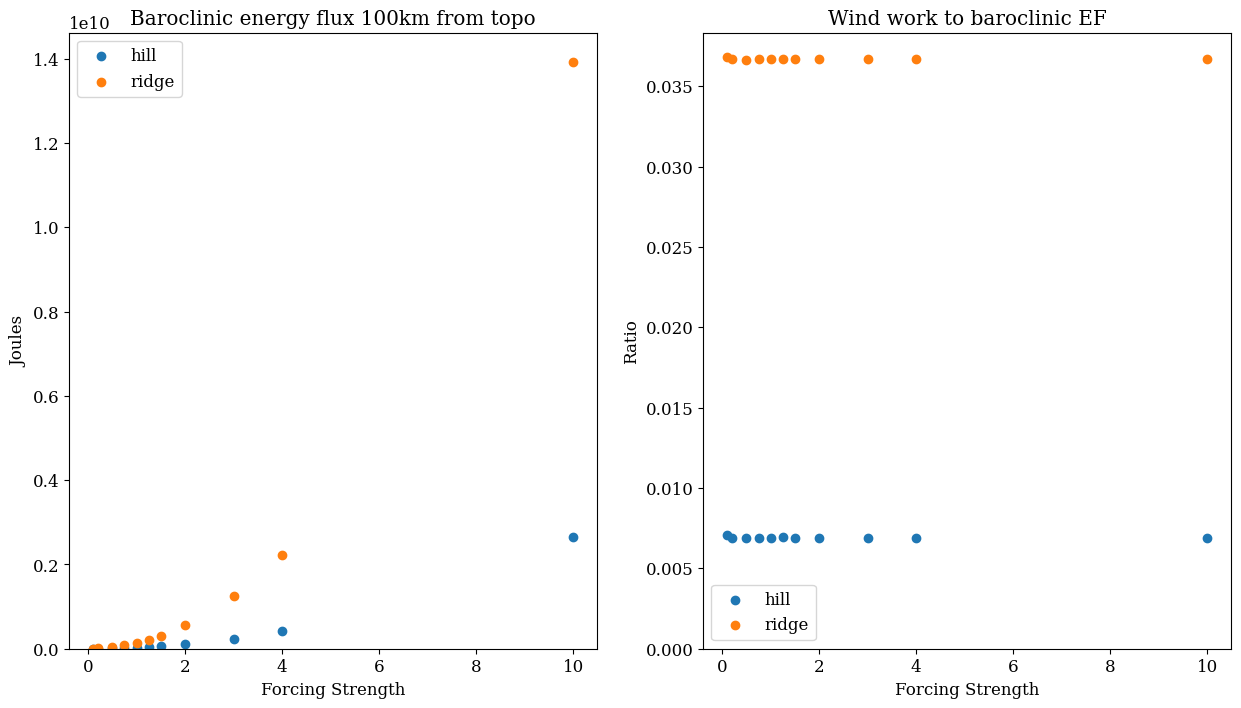

In [ ]:
fig,ax = plt.subplots(1,2,figsize = (15,8))

runs = np.array(strengths)
var = "strength"

for i in runs:
    # print(run)
    hww,htot,hratio = get_axes(h2[var])
    rww,rtot,rratio = get_axes(r2[var])

ax[0].set_title("Baroclinic energy flux 100km from topo")
ax[0].set_ylabel("Joules")
ax[1].set_ylabel("Ratio")
ax[0].set_xlabel("Forcing Strength")
ax[1].set_xlabel("Forcing Strength")


ax[1].set_title("Wind work to baroclinic EF")
ax[0].scatter(runs,htot,label = "hill")
ax[1].scatter(runs,hratio,label = "hill")
ax[0].scatter(runs,rtot,label = "ridge")
ax[1].scatter(runs,rratio,label = "ridge")

ax[0].set_ylim(0,None)
ax[1].set_ylim(0,None)
ax[0].legend()
ax[1].legend()

## Anomalies 

Text(0.5, 1.0, 'Sign flip of energy flux for tall ridge???')

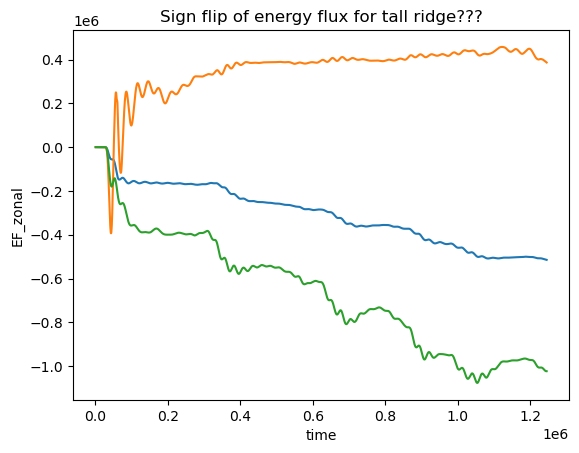

In [ ]:
h2["height"][2000].EF_zonal[:,1].cumsum("time").plot()
r2["height"][2000].EF_zonal[:,1].cumsum("time").plot()
r2["height"][1500].EF_zonal[:,1].cumsum("time").plot()
plt.title("Sign flip of energy flux for tall ridge???")

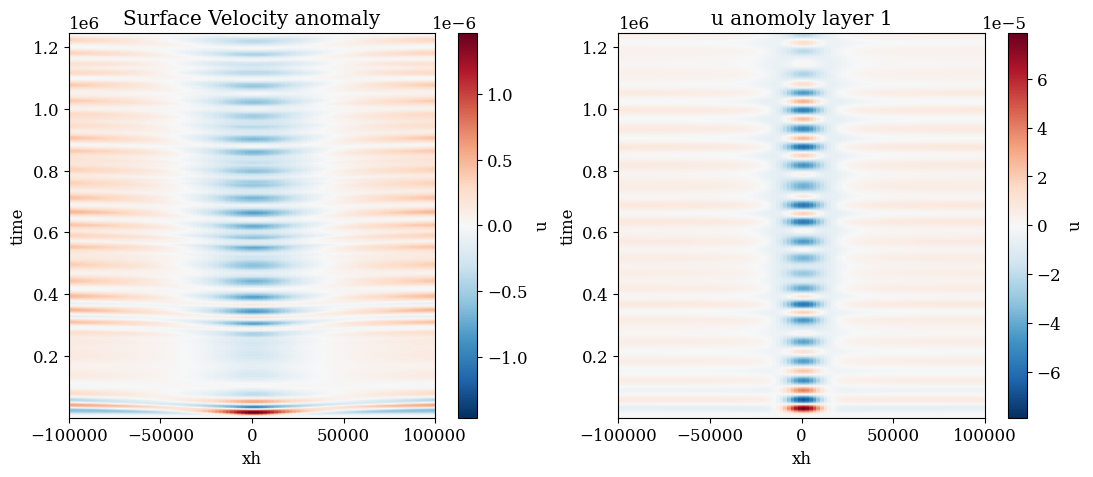

In [ ]:
def uprime_plot(data):
    fig,ax = plt.subplots(1,2,figsize = (13,5))
    eprime = (data.u - data.u.mean("xh")).isel(yh = 5)

    eprime.isel(zl = 0).plot(ax = ax[0])
    ax[0].set_title("Surface Velocity anomaly")
    eprime.isel(zl = 1).plot(ax = ax[1])
    ax[1].set_title("u anomoly layer 1")

uprime_plot(h2["height"][150])

## Simpler outlook? u' and e'

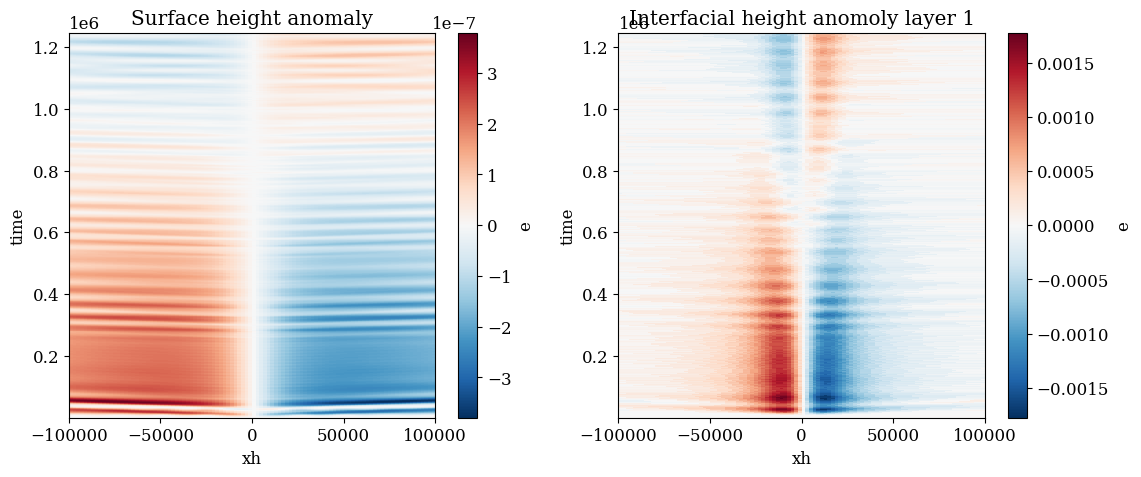

In [ ]:
def eprime_plot(data):
    fig,ax = plt.subplots(1,2,figsize = (13,5))
    eprime = (data.e - data.e.mean("xh")).isel(yh = 5)

    eprime.isel(zi = 0).plot(ax = ax[0])
    ax[0].set_title("Surface height anomaly")
    eprime.isel(zi = 1).plot(ax = ax[1])
    ax[1].set_title("Interfacial height anomoly layer 1")

eprime_plot(h2["height"][150])


## ENERGY BUDGETS

In [ ]:
import xrft

def fint(A,B):
    """Integrate fourier transformed fields"""
    return np.real(((A * np.conj(B)).sum("freq_time") * A["freq_time"].spacing))

def filter(a):
    A = xrft.fft(a,dim="time", true_phase=True, true_amplitude=True)
    f = 0.0001 / (np.pi * 2)
    A = A.where(np.abs(A.freq_time) > f,0)
    return A

def filtered_budget(xrange,yrange,exptpath,plot = False, fluxonly = False,flat = False,strat = 1,tlim = None,filtered = False):
    """
    Given the raw outputs of the model and lat/lon slices, return an energy budget.

    Dictionary contains east, west north south fluxes as well as total energy on interior and wind work.
    """

    datapath = f"/home/149/ab8992/bottom_near_inertial_waves/juneruns/{exptpath}"

    e = xr.open_mfdataset(datapath +  "/archive/output00*/e_10min.nc",decode_times = False,parallel = True,chunks = {"zl":1,"time":50}).sel(
        xh = slice(xrange[0],xrange[1]),yh = slice(yrange[0],yrange[1])).isel(
            time = slice(0,tlim)
        )
    u = xr.open_mfdataset(datapath +  "/archive/output00*/u_10min.nc",decode_times = False,parallel = True,chunks = {"zl":1,"time":50}).sel(
        xq = slice(xrange[0],xrange[1]),yh = slice(yrange[0],yrange[1])).isel(
            time = slice(0,tlim)
        )
    v = xr.open_mfdataset(datapath +  "/archive/output00*/v_10min.nc",decode_times = False,parallel = True,chunks = {"zl":1,"time":50}).sel(
        xh = slice(xrange[0],xrange[1]),yq = slice(yrange[0],yrange[1])).isel(
            time = slice(0,tlim)
        )
    tau = xr.open_mfdataset(datapath +  "/archive/output00*/taux_10min.nc",decode_times = False,parallel = True,chunks = {"time":50}).sel(
        xq = slice(xrange[0],xrange[1]),yh = slice(yrange[0],yrange[1])).isel(
            time = slice(0,tlim)
        )
    

    e = e.e.assign_coords({"time":("time",e.time.values * 60),
                            "xh":("xh",e.xh.values * 1000),
                            "yh":("yh",e.yh.values * 1000)
        }).astype(float)
    taux = tau.taux.assign_coords({"time":("time",tau.time.values * 60),
                            "xq":("xq",tau.xq.values * 1000),
                            "yh":("yh",tau.yh.values * 1000)
        }).interp(xq = e.xh).drop("xq").astype(float)
    u = u.u.assign_coords({"time":("time",u.time.values * 60),
                            "xq":("xq",u.xq.values * 1000),
                            "yh":("yh",u.yh.values * 1000)
        }).interp(xq = e.xh).drop("xq").astype(float)
    v = v.v.assign_coords({"time":("time",v.time.values * 60),
                            "yq":("yq",v.yq.values * 1000),
                            "xh":("xh",v.xh.values * 1000)
        }).interp(yq = e.yh).drop("yq").astype(float)

    e = e - e.isel(time = 0)

    H = 2000
    g = 9.8
    rho = 1027
    gprime = strat * g * 2 / rho

    g = 0




    # v = filter(v_).persist()
    # taux = filter(taux_).persist()

    if filtered == True:
        uprime = filter(u.load()).persist()
        vprime = filter(v.load()).persist()
        eprime = filter(e.load()).persist()

    else:
        uprime = u.persist()
        vprime = v.persist()
        eprime = e.persist()



    KE = e.isel(zi = 0) * 0
    PE = e.isel(zi = 0) * 0

    for z in range(u.zl.shape[0]):

        ## Kinetic Energy
        KE += H * u.isel(zl = z)**2
        KE += H * v.isel(zl = z)**2
        
    ## Potential Energy
    PE += g * e.isel(zi = 0)**2
    PE += gprime * e.isel(zi = 1)**2


    KE = 0.5*rho * KE.integrate("xh").integrate("yh")
    PE = 0.5*rho * PE.integrate("xh").integrate("yh")

    E = KE + PE

    # S = (u.isel(zl = 0)*taux).sel(xh = slice(xrange[0] +4000,xrange[1] -4000),yh = slice(yrange[0]+4000,yrange[1]-4000)).integrate("xh").integrate("yh")
    # S = (fint(u.isel(zl = 0),taux)).integrate("xh").integrate("yh") ## Maybe this was superinertial S?
    S = (u.isel(zl = 0) * taux).integrate("xh").integrate("yh")


    if filtered != True:
        ## Energy Flux surface integral
        ## Hardcoded for 2 layer for now

        F_NS = 0
        F_EW = 0

        F_W = rho * H * (
            g * (uprime.isel(zl = 0) + uprime.isel(zl = 1))  * eprime.isel(zi = 0) +       ## Surface layer contribution
            gprime * uprime.isel(zl = 1) * eprime.isel(zi = 1)                        ## Internal layer contributions
        ).isel(xh = 0).integrate("yh")

        F_E = - rho * H * (
            g * (uprime.isel(zl = 0) + uprime.isel(zl = 1))  * eprime.isel(zi = 0) +       ## Surface layer contribution
            gprime * uprime.isel(zl = 1) * eprime.isel(zi = 1)                        ## Internal layer contributions
        ).isel(xh = -1).integrate("yh")

        F_EW = F_E + F_W

        F_S = rho * H * (
            g * (vprime.isel(zl = 0) + vprime.isel(zl = 1))  * eprime.isel(zi = 0) +       ## Surface layer contribution
            gprime * vprime.isel(zl = 1) * eprime.isel(zi = 1)                        ## Internal layer contributions
        ).isel(yh = 0).integrate("xh")

        F_N = - rho * H * (
            g * (vprime.isel(zl = 0) + vprime.isel(zl = 1))  * eprime.isel(zi = 0) +       ## Surface layer contribution
            gprime * vprime.isel(zl = 1) * eprime.isel(zi = 1)                        ## Internal layer contributions
        ).isel(yh = -1).integrate("xh")

        F_NS = F_N + F_S


        fig,ax = plt.subplots(1,figsize = (15,15))
        E.isel(time = slice(0,tlim)).differentiate("time").cumsum("time").plot(ax = ax,label = r"$\int \partial_t E dt$")
        (F_NS).cumsum("time").isel(time = slice(0,tlim)).plot(ax = ax,label = "North South flux")
        (F_EW).cumsum("time").isel(time = slice(0,tlim)).plot(ax = ax,label = "East West flux")
        (F_NS + S + F_EW).cumsum("time").isel(time = slice(0,tlim)).plot(ax = ax,label = "Flux + Source")
        S.cumsum("time").isel(time = slice(0,tlim)).plot(ax = ax,label = "S")
        ax.set_title(r"Cumulitive energy budget $\int_V EdV + \int \int_S F dA dt = \int \int_V S dV dt$")
        ax.legend()

    if filtered == True:
        ## Energy Flux surface integral
        ## Hardcoded for 2 layer for now

        F_NS = 0
        F_EW = 0

        F_W = rho * H * (
            g * fint(u.isel(zl = 0) + u.isel(zl = 1)  , e.isel(zi = 0)) +       ## Surface layer contribution
            gprime * fint(u.isel(zl = 1) , e.isel(zi = 1))                        ## Internal layer contributions
        ).sel(xh = xrange[0]).integrate("yh")

        F_E = - rho * H * (
            g * fint(u.isel(zl = 0) + u.isel(zl = 1)  , e.isel(zi = 0)) +       ## Surface layer contribution
            gprime * fint(u.isel(zl = 1) , e.isel(zi = 1))                        ## Internal layer contributions
        ).sel(xh = xrange[1]).integrate("yh")

        F_EW = F_E + F_W

        F_S = rho * H * (
            g * fint(v.isel(zl = 0) + v.isel(zl = 1)  , e.isel(zi = 0)) +       ## Surface layer contribution
            gprime * fint(v.isel(zl = 1) , e.isel(zi = 1))                       ## Internal layer contributions
        ).sel(yh = yrange[0]).integrate("xh")

        F_N = - rho * H * (
            g * fint(v.isel(zl = 0) + v.isel(zl = 1)  , e.isel(zi = 0)) +       ## Surface layer contribution
            gprime * fint(v.isel(zl = 1) , e.isel(zi = 1))                        ## Internal layer contributions
        ).sel(yh = yrange[1]).integrate("xh")

        F_NS = F_N + F_S






    return {"E":E,"F_NS":F_NS,"F_EW":F_EW,"S":S,"F_E":F_E,"F_W":F_W,"F_S":F_S,"F_N":F_N}


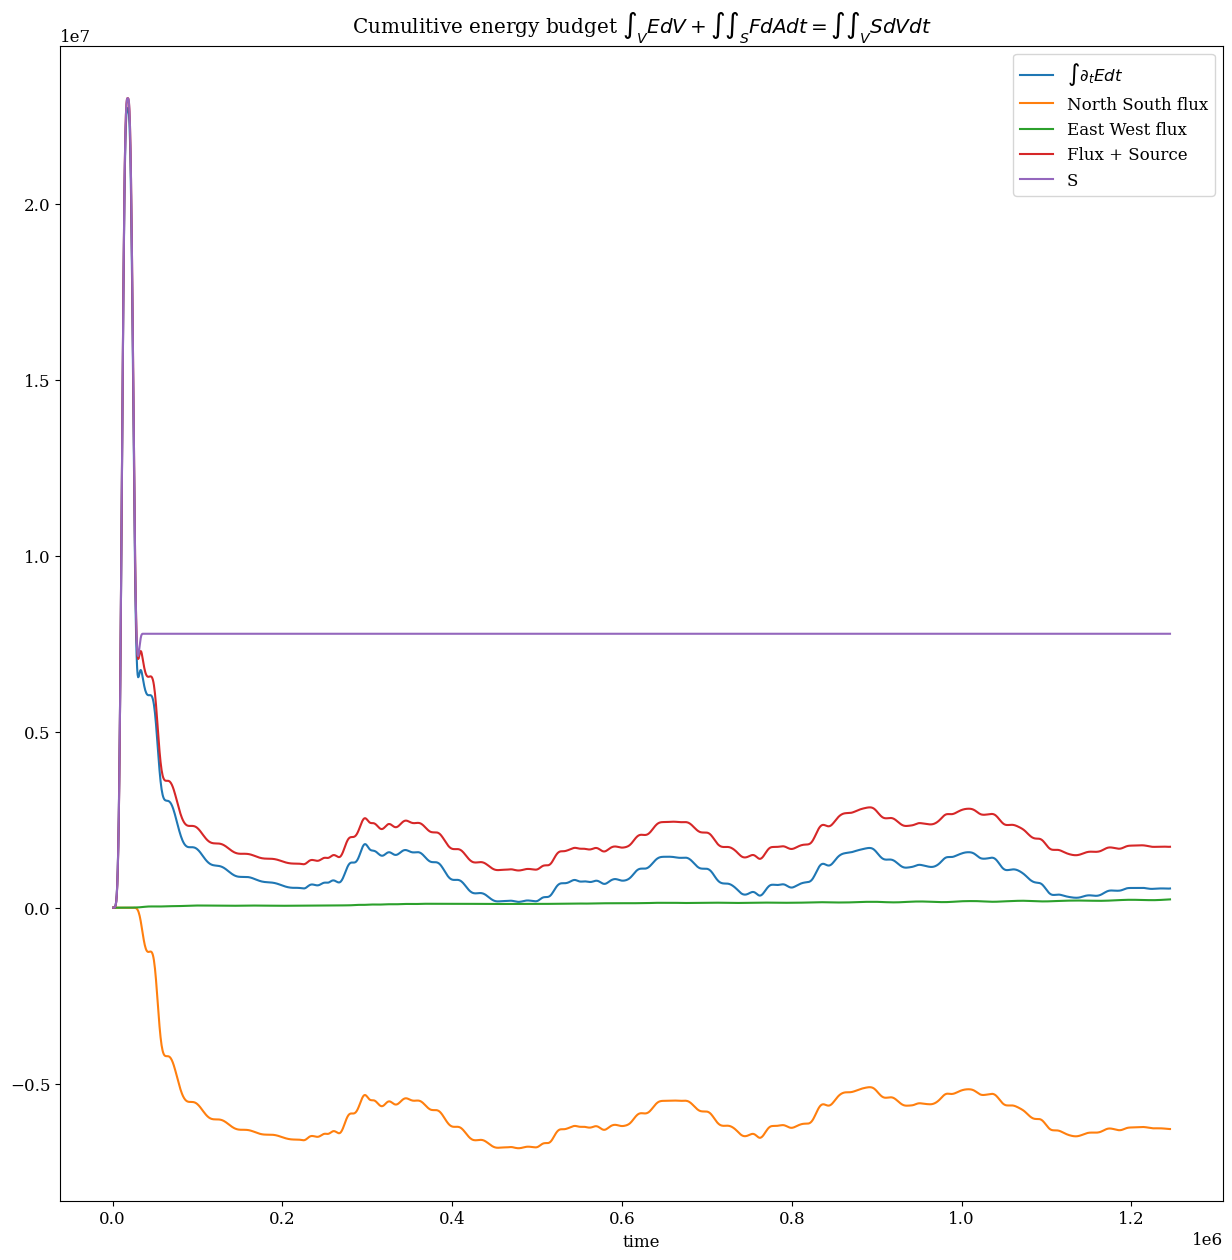

In [ ]:

xrange = [-100,100] 
yrange = [-1600,-1400]
exptpath = "june_forcing_latwidth_ridge_2layer/june_forcing_latwidth_ridge_2layer_forcing_latwidth-50"
a = filtered_budget(xrange,yrange,exptpath,plot = False, fluxonly = False,flat = False,strat = 1,tlim = None,filtered = False)


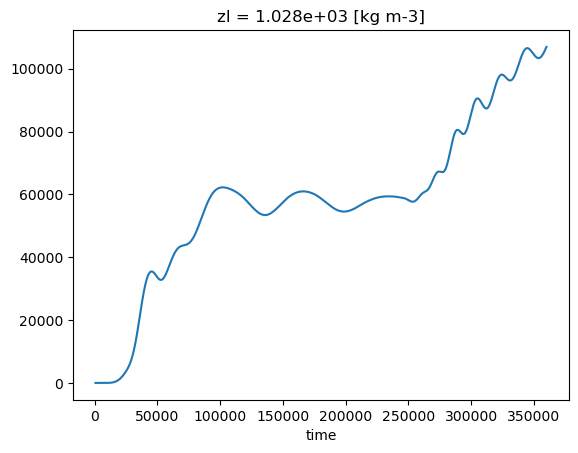

In [ ]:
a["F_EW"].cumsum("time").plot()

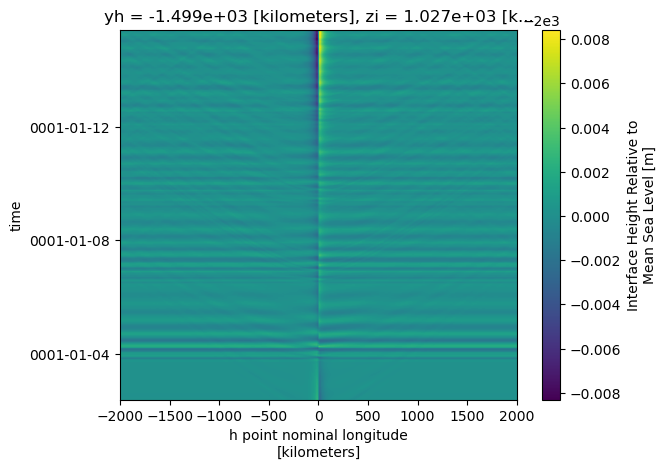

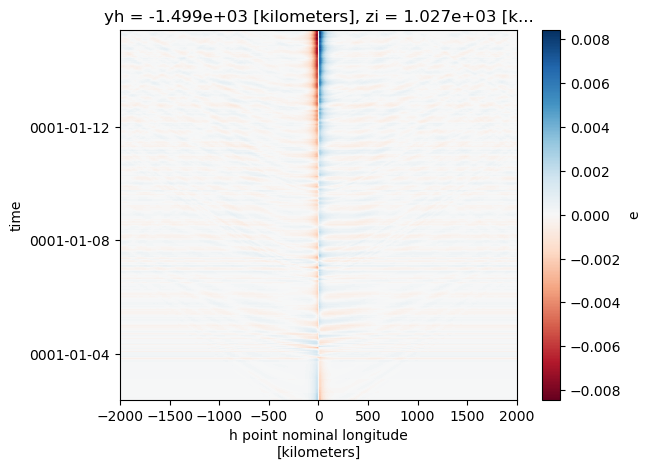

In [ ]:
e = xr.open_mfdataset("/home/149/ab8992/bottom_near_inertial_waves/juneruns/june_forcing_latwidth_ridge_2layer/june_forcing_latwidth_ridge_2layer_forcing_latwidth-50/archive/output*/e_10min.nc").isel(yh = 250)

e.e.isel(time = slice(200,None),zi = 1).plot()
plt.figure()
(e.e - e.e.mean("xh")).isel(time = slice(200,None),zi = 1).plot(cmap = "RdBu")


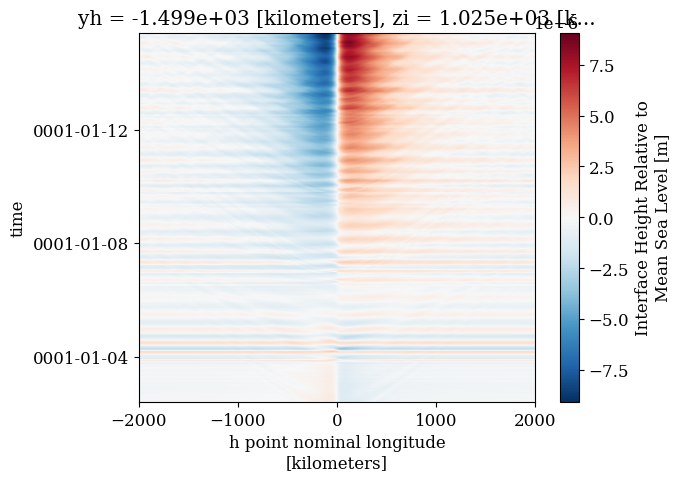

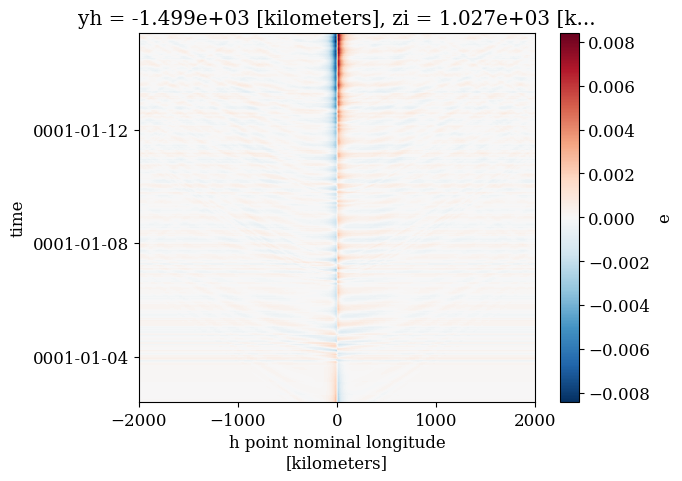

In [ ]:
e.e.isel(zi = 0,time = slice(200,None)).plot()
plt.figure()
(e.e - e.e.mean("xh")).isel(time = slice(200,None),zi = 1).plot()



## As Andy suggested, compute Energy only no EF



In [ ]:
def energyonly(xrange,yrange,exptpath,plot = False, fluxonly = False,flat = False,strat = 1,tlim = None):
    """
    Given the raw outputs of the model and lat/lon slices, return an energy budget.

    Dictionary contains east, west north south fluxes as well as total energy on interior and wind work.
    """

    datapath = f"/home/149/ab8992/bottom_near_inertial_waves/juneruns/{exptpath}"

    e = xr.open_mfdataset(datapath +  "/archive/output00*/e_10min.nc",decode_times = False,parallel = True,chunks = {"zl":1,"time":50}).sel(
        xh = slice(xrange[0],xrange[1]),yh = slice(yrange[0],yrange[1])).isel(
            time = slice(0,tlim)
        )
    u = xr.open_mfdataset(datapath +  "/archive/output00*/u_10min.nc",decode_times = False,parallel = True,chunks = {"zl":1,"time":50}).sel(
        xq = slice(xrange[0],xrange[1]),yh = slice(yrange[0],yrange[1])).isel(
            time = slice(0,tlim)
        )
    v = xr.open_mfdataset(datapath +  "/archive/output00*/v_10min.nc",decode_times = False,parallel = True,chunks = {"zl":1,"time":50}).sel(
        xh = slice(xrange[0],xrange[1]),yq = slice(yrange[0],yrange[1])).isel(
            time = slice(0,tlim)
        )
    tau = xr.open_mfdataset(datapath +  "/archive/output00*/taux_10min.nc",decode_times = False,parallel = True,chunks = {"time":50}).sel(
        xq = slice(xrange[0],xrange[1]),yh = slice(yrange[0],yrange[1])).isel(
            time = slice(0,tlim)
        )
    

    e = e.e.assign_coords({"time":("time",e.time.values * 60),
                            "xh":("xh",e.xh.values * 1000),
                            "yh":("yh",e.yh.values * 1000)
        }).astype(float)
    taux = tau.taux.assign_coords({"time":("time",tau.time.values * 60),
                            "xq":("xq",tau.xq.values * 1000),
                            "yh":("yh",tau.yh.values * 1000)
        }).interp(xq = e.xh).drop("xq").astype(float)
    u = u.u.assign_coords({"time":("time",u.time.values * 60),
                            "xq":("xq",u.xq.values * 1000),
                            "yh":("yh",u.yh.values * 1000)
        }).interp(xq = e.xh).drop("xq").astype(float)
    v = v.v.assign_coords({"time":("time",v.time.values * 60),
                            "yq":("yq",v.yq.values * 1000),
                            "xh":("xh",v.xh.values * 1000)
        }).interp(yq = e.yh).drop("yq").astype(float)



    H = 2000
    g = 9.8
    rho = 1027
    gprime = strat * g * 2 / rho

    g = 0

    v_ = v
    taux_ = taux
    u_ = u
    e_ = e



    # v = filter(v_)
    # taux = filter(taux_)
    # u = filter(u_)
    # e = filter(e_)

    # ACTUALLY DON'T FILTER!
    v = v.persist()
    taux = taux.persist()
    u = u.persist()
    e = (e - e.isel(time = 0)).persist()


    KE = e.isel(zi = 0) * 0
    PE = e.isel(zi = 0) * 0

    for z in range(u.zl.shape[0]):

        ## Kinetic Energy
        KE += H * u.isel(zl = z)**2
        KE += H * v.isel(zl = z)**2
        
    ## Potential Energy
    PE += g * e.isel(zi = 0)**2
    PE += gprime * e.isel(zi = 1)**2

    KE = 0.5*rho * KE
    PE = 0.5*rho * PE

    E = KE + PE

    # S = (u.isel(zl = 0)*taux).sel(xh = slice(xrange[0] +4000,xrange[1] -4000),yh = slice(yrange[0]+4000,yrange[1]-4000)).integrate("xh").integrate("yh")
    # S = (fint(u.isel(zl = 0),taux)).integrate("xh").integrate("yh") ## Maybe this was superinertial S?
    S = (u_.isel(zl = 0) * taux).integrate("xh").integrate("yh")

    return {"E":E,"S":S,"KE":KE,"PE":PE}

In [ ]:
xrange = [-100,100] 
yrange = [-1600,-1400]
exptpath = "june_forcing_latwidth_ridge_2layer/june_forcing_latwidth_ridge_2layer_forcing_latwidth-50"

E = energyonly(xrange,yrange,exptpath,plot = False, fluxonly = False,flat = False,strat = 1,tlim = None)


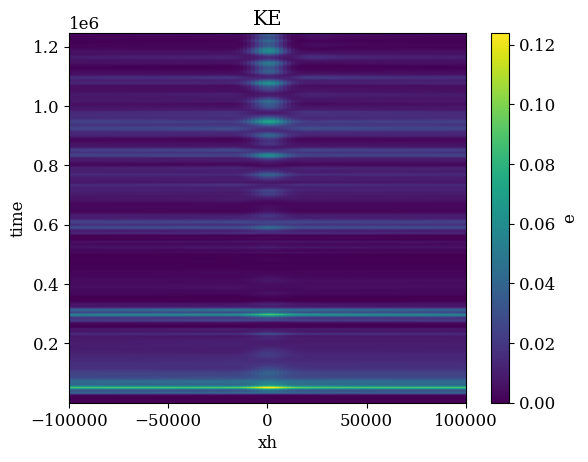

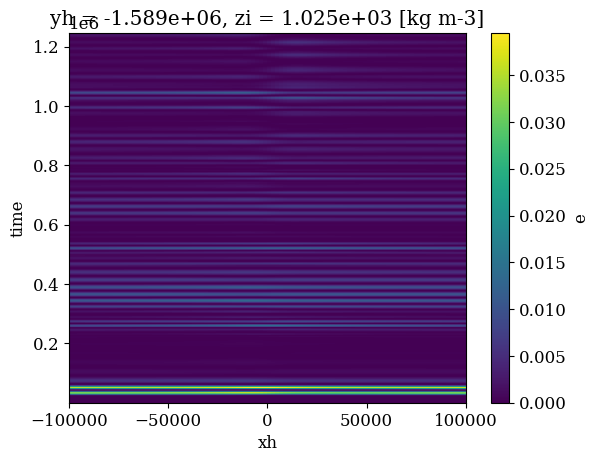

In [ ]:
E["KE"].isel(yh = 5).plot()
plt.title("KE")
plt.figure()
plt.title("PE")

E["PE"].isel(yh = 5).plot()


Text(0.5, 1.0, 'Total energy, integrated in z and y')

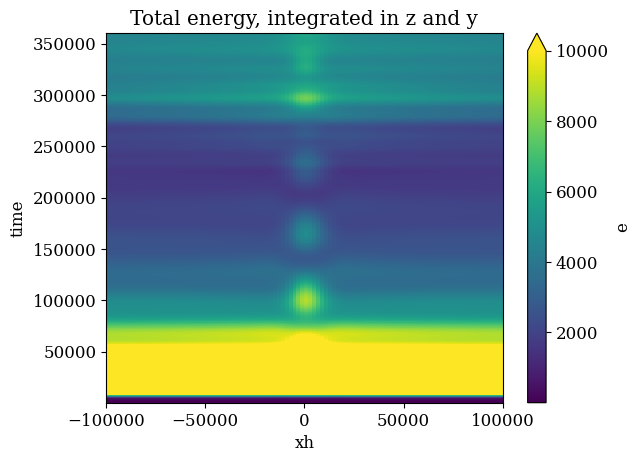

In [ ]:
((E["E"]).integrate("yh").isel(time = slice(0,None))).plot(vmax = 10000)
plt.title("Total energy, integrated in z and y")

## Wed 28th: Check filtered velocities

In [ ]:
u = xr.open_mfdataset(
    f"/home/149/ab8992/bottom_near_inertial_waves/juneruns/june_forcing_latwidth_ridge_2layer/june_forcing_latwidth_ridge_2layer_forcing_latwidth-50/archive/output*/u_10min.nc",chunks = {"xq":10,"zl":1,"time":None}).isel(yh = 250)

u.u.isel(zl = 0).plot()

KeyboardInterrupt: 

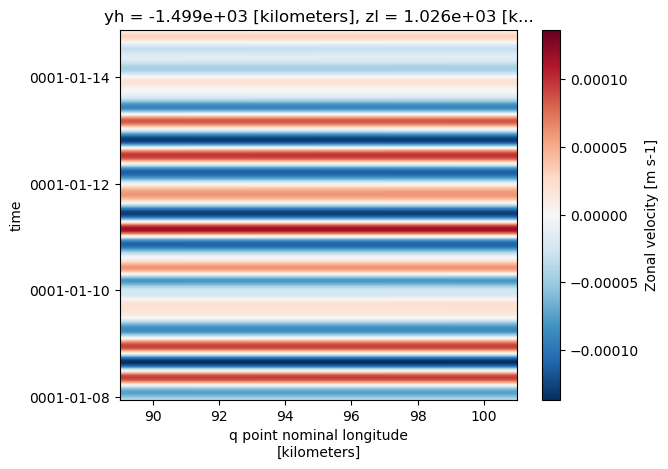

In [ ]:
u.u.isel(zl = 0).plot()

In [ ]:
f = 0.0001

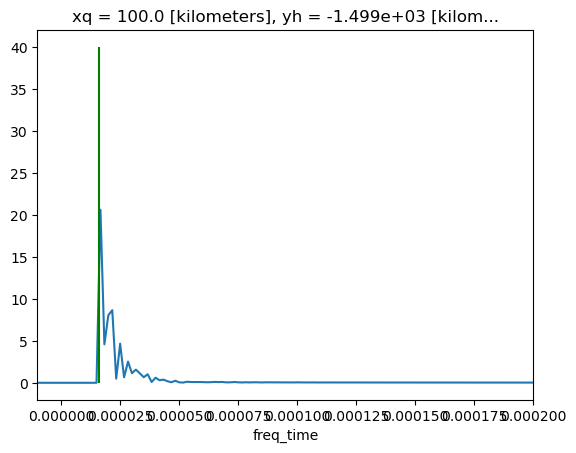

In [ ]:
np.abs(U).isel(zl = 0,xq = -1).plot()
plt.xlim(-0.00001,0.0002)
plt.vlines(f / (2 * np.pi),0,40,color = "green")

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

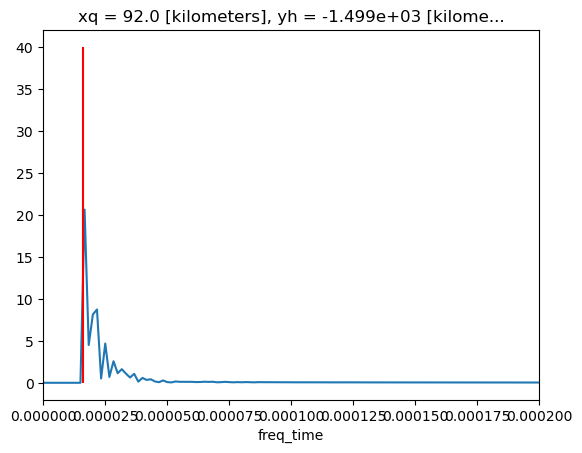

In [ ]:
expt = "june_forcing_latwidth_ridge_2layer/june_forcing_latwidth_ridge_2layer_forcing_latwidth-50"

u = xr.open_mfdataset(
    f"/home/149/ab8992/bottom_near_inertial_waves/juneruns/{expt}/archive/output*/u_10min.nc",chunks = {"xq":10,"zl":1,"time":None}).isel(yh = 250,time = slice(1000,2000)).sel(xq = slice(90,100))



U = filter(u.u.load())


np.abs(U).isel(zl = 1,xq = 1).plot()
plt.xlim(0,0.0002)
plt.vlines(f / (2 * np.pi),0,40,color = "red")
plt.figure


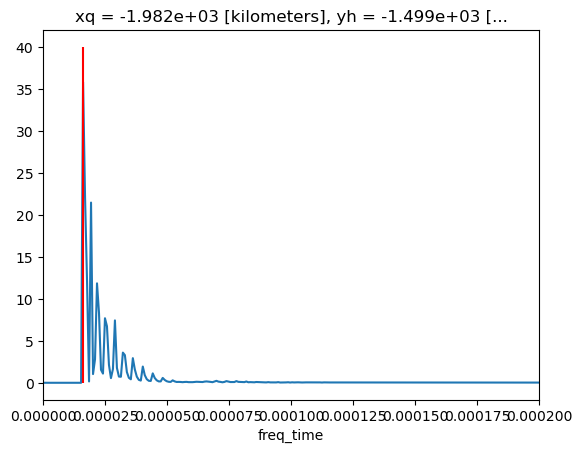

In [ ]:
u_far = xr.open_mfdataset(
    f"/home/149/ab8992/bottom_near_inertial_waves/juneruns/{expt}/archive/output*/u_10min.nc",chunks = {"xq":None,"zl":1,"time":None}).isel(yh = 250).isel(xq = slice(0,10),time = slice(0,1000))
U_far = filter(u_far.u.load())

np.abs(U_far).isel(zl = 1,xq = -1).plot()
plt.xlim(0,0.0002)
plt.vlines(f / (2 * np.pi),0,40,color = "red")

In [ ]:
u_far = xr.open_mfdataset(
    f"/home/149/ab8992/bottom_near_inertial_waves/juneruns/{expt}/archive/output*/u_10min.nc",chunks = {"xq":None,"zl":1,"time":None})

u_far

<xarray.Dataset>
Dimensions:  (xq: 2001, yh: 500, zl: 2, time: 2076)
Coordinates:
  * xq       (xq) float64 -2e+03 -1.998e+03 -1.996e+03 ... 1.998e+03 2e+03
  * yh       (yh) float64 -1.999e+03 -1.997e+03 ... -1.003e+03 -1.001e+03
  * zl       (zl) float64 1.026e+03 1.028e+03
  * time     (time) object 0001-01-01 00:10:00 ... 0001-01-15 10:00:00
Data variables:
    u        (time, zl, yh, xq) float32 dask.array<chunksize=(60, 1, 500, 2001), meta=np.ndarray>
Attributes:
    filename:   u_10min.nc
    title:      Ashley Channel Multiridge Bottom
    grid_type:  regular
    grid_tile:  N/A

## Spatial filtering again?

Seems that temporal filtering won't split things apart. There's no difference in the spread of frequencies close/ far / soon /late. Spatial could separate waves of interest?

Problem is that calculating the vertical modes below, it seems that the k corresponding to frequencies near correspond to ridiculously large wavelengths

In [2]:
def kn(n,om,N):
    return np.pi * (np.sqrt(om**2 - f**2) / N) * (2 * n + 1) / (2 * 4000)

f = 0.0001 / (2 * np.pi)

N = np.sqrt( (9.8 / 1027) * (4/4000))
print(N,f)

L = 0.001 * 2 * np.pi / kn(0,2*f,N)

print(L)

0.003089070471484815 1.5915494309189534e-05
1792.945298321233


### Spatially and temporally filter:

In [4]:
name = "height"
val = 450
expt = f"june_{name}_ridge_5layer/june_{name}_ridge_5layer_{name}-{val}"

uslice = xr.open_mfdataset(
    f"/home/149/ab8992/bottom_near_inertial_waves/juneruns/{expt}/archive/output001/u_10min.nc",decode_times = False).isel(yh = 250,zl = 1).load()

uslice = uslice.u.assign_coords({"time":("time",uslice.time.values * 60),
                        "xq":("xq",uslice.xq.values * 1000)
    })

In [13]:
import xrft




U = xrft.power_spectrum(uslice,true_phase=True, true_amplitude=True).load()

U_far = xrft.power_spectrum(uslice.sel(xq = slice(25000,None)),true_phase=True, true_amplitude=True).load()
U_half = xrft.power_spectrum(uslice.sel(xq = slice(0,None)),true_phase=True, true_amplitude=True).load()



(0.0, 0.0008329199735449736)

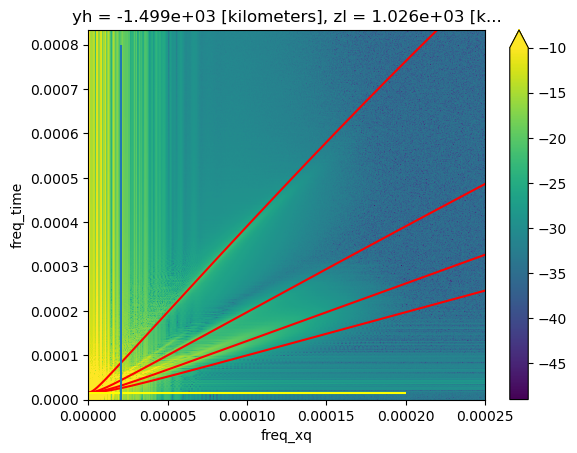

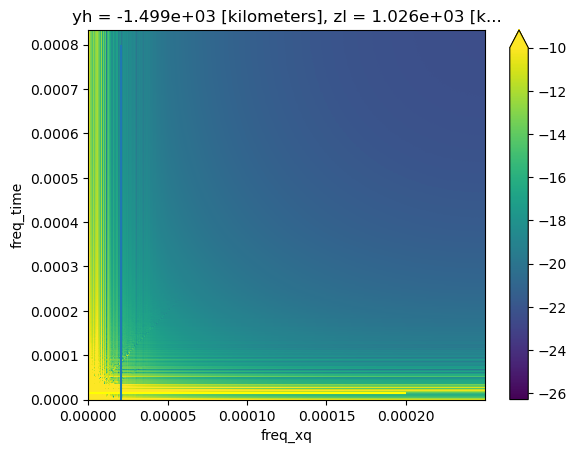

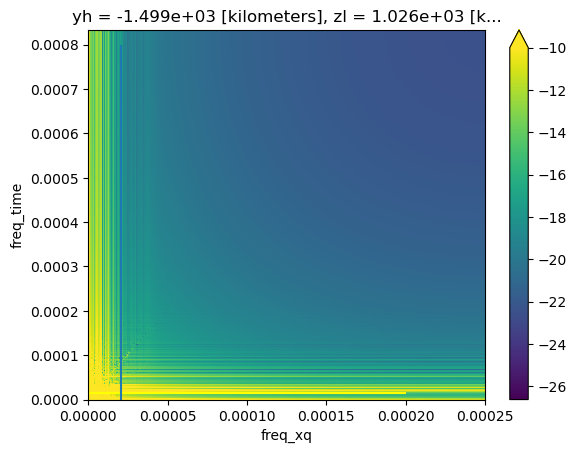

In [15]:

f = 0.0001 / (2 * np.pi)

N = np.sqrt( (9.8 / 1027) * (4/4000))
k = U.freq_xq

def omega(k,f,N,n,H,l = 0):
    f = np.full(k.shape,f)
    N = np.full(k.shape,N)
    n = np.full(k.shape,n)
    H = np.full(k.shape,H)
    l = np.full(k.shape,l)
    K2 = k**2 + l**2
    
    m = np.pi * n / H
    num = f**2 * m**2 + K2 * N ** 2
    den = K2 + m ** 2
    return np.sqrt(num / den)

om = omega(k,f,N,1,4000)

ridge_width = 25000
ridge_k = np.pi * 2 / ridge_width
forcing_k = np.pi * 2 / (300000)

rossby_k = np.pi * 2 / (np.sqrt(9.8 * 4000)/0.0001)

np.log(U).plot(vmax = -10)

for i in range(5):
    plt.plot(k,omega(k,f,N,i,4000),color = "red")

plt.hlines(f,0,0.0002,color = "yellow")
plt.vlines(ridge_k,0,0.0008)
plt.vlines(forcing_k,0,0.0008)
plt.xlim(0,None)
plt.ylim(0,None)

plt.figure()

np.log(U_far).plot(vmax = -10)

# for i in range(5):
#     plt.plot(k,omega(k,f,N,i,4000),color = "red")

plt.hlines(f,0,0.0002,color = "yellow")
plt.vlines(ridge_k,0,0.0008)
plt.vlines(forcing_k,0,0.0008)
plt.xlim(0,None)
plt.ylim(0,None)

plt.figure()

np.log(U_half).plot(vmax = -10)

# for i in range(5):
#     plt.plot(k,omega(k,f,N,i,4000),color = "red")

plt.hlines(f,0,0.0002,color = "yellow")
plt.vlines(ridge_k,0,0.0008)
plt.vlines(forcing_k,0,0.0008)
plt.xlim(0,None)
plt.ylim(0,None)

## Power Spectra of interfacial heights instead

In [20]:
import xrft

eslice = xr.open_mfdataset(
    f"/home/149/ab8992/bottom_near_inertial_waves/juneruns/{expt}/archive/output001/e_10min.nc",decode_times = False).isel(yh = 250,zi = 1)

eslice = eslice.e.assign_coords({"time":("time",eslice.time.values * 60),
                        "xh":("xh",eslice.xh.values * 1000)
    })

eanom = (eslice - eslice.mean("xh"))

E = xrft.power_spectrum(eslice,true_phase=True, true_amplitude=True).load()

E_far = xrft.power_spectrum(eslice.sel(xh = slice(25000,None)),true_phase=True, true_amplitude=True).load()
E_half = xrft.power_spectrum(eslice.sel(xh = slice(0,None)),true_phase=True, true_amplitude=True).load()



(0.0, 0.0008329199735449736)

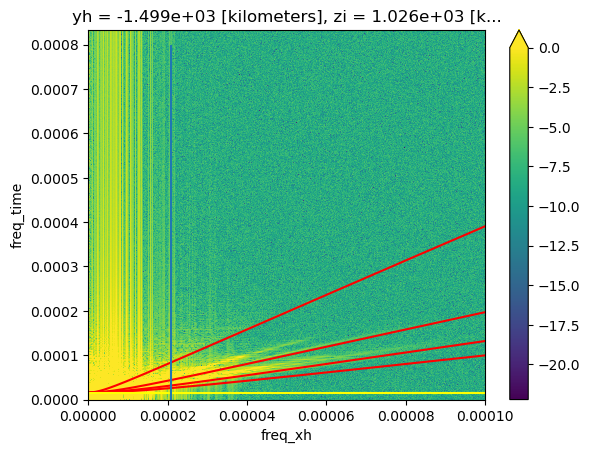

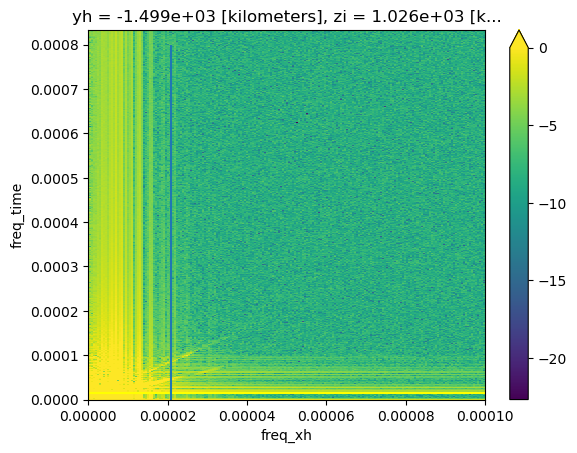

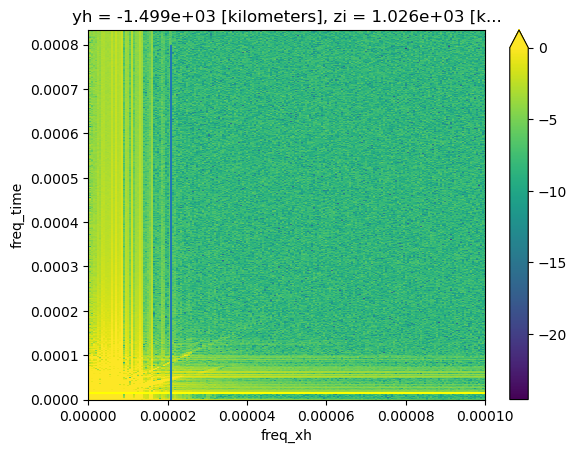

In [26]:

f = 0.0001 / (2 * np.pi)

N = np.sqrt( (9.8 / 1027) * (4/4000))
k = U.freq_xq

def omega(k,f,N,n,H,l = 0):
    f = np.full(k.shape,f)
    N = np.full(k.shape,N)
    n = np.full(k.shape,n)
    H = np.full(k.shape,H)
    l = np.full(k.shape,l)
    K2 = k**2 + l**2
    
    m = np.pi * n / H
    num = f**2 * m**2 + K2 * N ** 2
    den = K2 + m ** 2
    return np.sqrt(num / den)

om = omega(k,f,N,1,4000)

vmax = 0
ridge_width = 25000
ridge_k = np.pi * 2 / ridge_width
forcing_k = np.pi * 2 / (300000)

rossby_k = np.pi * 2 / (np.sqrt(9.8 * 4000)/0.0001)

np.log(E).plot(vmax = vmax)

for i in range(5):
    plt.plot(k,omega(k,f,N,i,4000),color = "red")

plt.hlines(f,0,0.0002,color = "yellow")
plt.vlines(ridge_k,0,0.0008)
plt.vlines(forcing_k,0,0.0008)
plt.xlim(0,0.0001)
plt.ylim(0,None)

plt.figure()

np.log(E_far).plot(vmax = vmax)

# for i in range(5):
#     plt.plot(k,omega(k,f,N,i,4000),color = "red")

plt.hlines(f,0,0.0002,color = "yellow")
plt.vlines(ridge_k,0,0.0008)
plt.vlines(forcing_k,0,0.0008)
plt.xlim(0,0.0001)
plt.ylim(0,None)

plt.figure()

np.log(E_half).plot(vmax = vmax)

# for i in range(5):
#     plt.plot(k,omega(k,f,N,i,4000),color = "red")

plt.hlines(f,0,0.0002,color = "yellow")
plt.vlines(ridge_k,0,0.0008)
plt.vlines(forcing_k,0,0.0008)
plt.xlim(0,0.0001)
plt.ylim(0,None)

In [56]:
import xrft

eslice = xr.open_mfdataset(
    f"/home/149/ab8992/bottom_near_inertial_waves/juneruns/{expt}/archive/output00*/e_10min.nc",decode_times = False).isel(yh = 250,zi = 1)

eslice = eslice.e.assign_coords({"time":("time",eslice.time.values * 60),
                        "xh":("xh",eslice.xh.values * 1000)
    })

eanom = (eslice - eslice.mean("xh")).load()

E_ = xrft.power_spectrum(eanom,true_phase=True, true_amplitude=True).load()

E_far_ = xrft.power_spectrum(eanom.sel(xh = slice(25000,None)),true_phase=True, true_amplitude=True).load()
E_half_ = xrft.power_spectrum(eanom.sel(xh = slice(0,None)),true_phase=True, true_amplitude=True).load()



KeyboardInterrupt: 

Process Dask Worker process (from Nanny):
2023-06-28 13:58:33,555 - distributed.nanny - ERROR - Worker process died unexpectedly
2023-06-28 13:58:33,556 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/distributed/process.py", line 202, in _run
    target(*args, **kwargs)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/distributed/nanny.py", line 990, in _run
    asyncio

(0.0, 0.0008329199735449736)

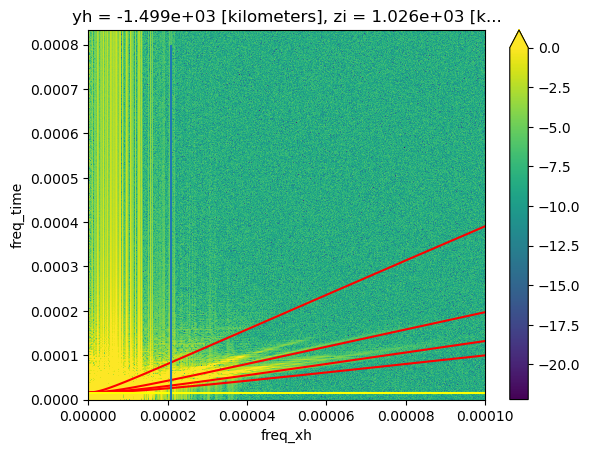

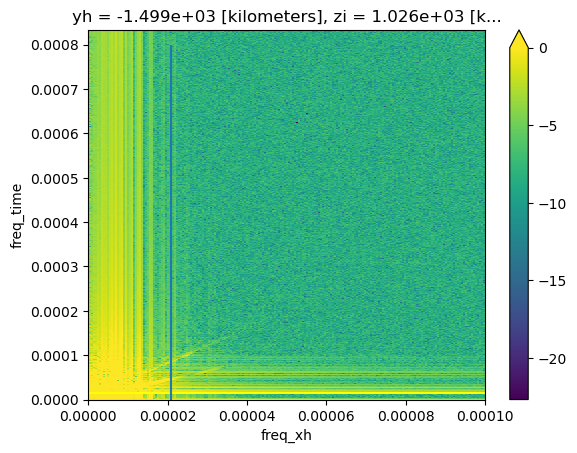

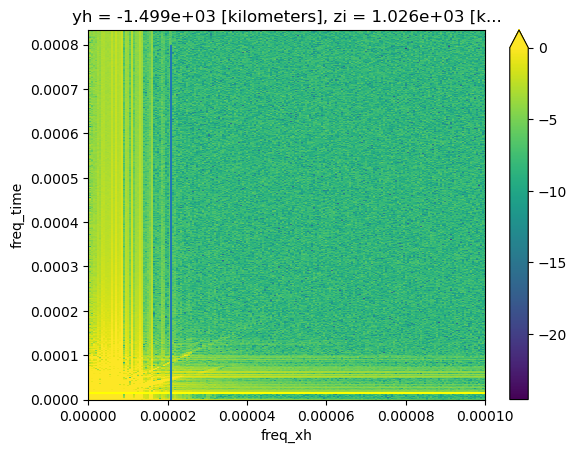

In [32]:

f = 0.0001 / (2 * np.pi)

N = np.sqrt( (9.8 / 1027) * (4/4000))
k = U.freq_xq

def omega(k,f,N,n,H,l = 0):
    f = np.full(k.shape,f)
    N = np.full(k.shape,N)
    n = np.full(k.shape,n)
    H = np.full(k.shape,H)
    l = np.full(k.shape,l)
    K2 = k**2 + l**2
    
    m = np.pi * n / H
    num = f**2 * m**2 + K2 * N ** 2
    den = K2 + m ** 2
    return np.sqrt(num / den)

om = omega(k,f,N,1,4000)

vmax = 0
ridge_width = 25000
ridge_k = np.pi * 2 / ridge_width
forcing_k = np.pi * 2 / (300000)

rossby_k = np.pi * 2 / (np.sqrt(9.8 * 4000)/0.0001)

np.log(E_).plot(vmax = vmax)

for i in range(5):
    plt.plot(k,omega(k,f,N,i,4000),color = "red")

plt.hlines(f,0,0.0002,color = "yellow")
plt.vlines(ridge_k,0,0.0008)
plt.vlines(forcing_k,0,0.0008)
plt.xlim(0,0.0001)
plt.ylim(0,None)

plt.figure()

np.log(E_far_).plot(vmax = vmax)

# for i in range(5):
#     plt.plot(k,omega(k,f,N,i,4000),color = "red")

plt.hlines(f,0,0.0002,color = "yellow")
plt.vlines(ridge_k,0,0.0008)
plt.vlines(forcing_k,0,0.0008)
plt.xlim(0,0.0001)
plt.ylim(0,None)

plt.figure()

np.log(E_half_).plot(vmax = vmax)

# for i in range(5):
#     plt.plot(k,omega(k,f,N,i,4000),color = "red")

plt.hlines(f,0,0.0002,color = "yellow")
plt.vlines(ridge_k,0,0.0008)
plt.vlines(forcing_k,0,0.0008)
plt.xlim(0,0.0001)
plt.ylim(0,None)

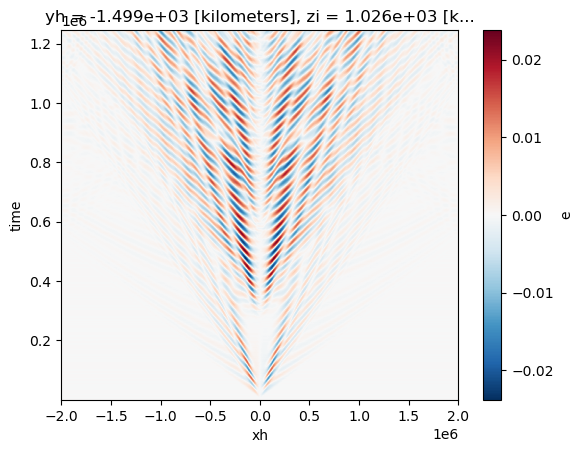

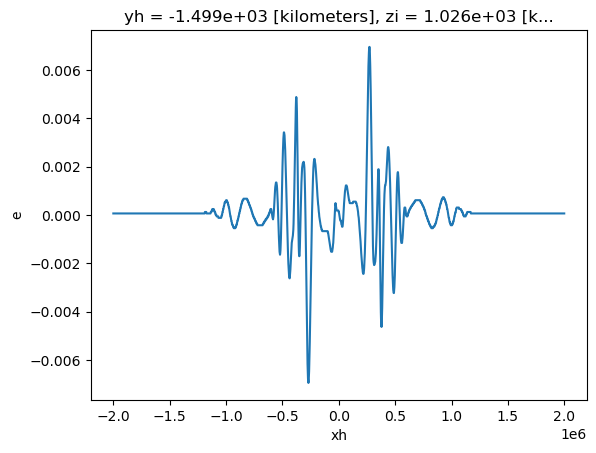

In [19]:
(eslice - eslice.mean("xh")).plot()

plt.figure()
(eslice[500,:] - eslice[500,:].mean("xh")).plot()

In [6]:
import xrft


def plot_espectrum(expt,n):
    eslice = xr.open_mfdataset(
        f"/home/149/ab8992/bottom_near_inertial_waves/juneruns/{expt}/archive/output00*/e_10min.nc",decode_times = False).isel(yh = 250,zi = n)

    eslice = eslice.e.assign_coords({"time":("time",eslice.time.values * 60),
                            "xh":("xh",eslice.xh.values * 1000)
        })

    eanom = (eslice - eslice.mean("xh")).load()

    E_ = xrft.power_spectrum(eanom,true_phase=True, true_amplitude=True).load()

    E_far_ = xrft.power_spectrum(eanom.sel(xh = slice(25000,None)),true_phase=True, true_amplitude=True).load()
    E_half_ = xrft.power_spectrum(eanom.sel(xh = slice(0,None)),true_phase=True, true_amplitude=True).load()


    eanom_flipped = xr.DataArray(
        data = eanom[::-1,:].values,
        coords = [600 - eanom.time[::-1],eanom.xh],
        dims = ["time","xh"]
    )

    extended = xr.concat([eanom_flipped,eanom],dim = "time")

    extended.plot()
    plt.figure()

    ## Try with extended domain

    E_ = xrft.power_spectrum(extended,true_phase=True, true_amplitude=True).load()

    E_far_ = xrft.power_spectrum(extended.sel(xh = slice(25000,None)),true_phase=True, true_amplitude=True).load()
    E_half_ = xrft.power_spectrum(extended.sel(xh = slice(100000,None)),true_phase=True, true_amplitude=True).load()


    f = 0.0001 / (2 * np.pi)

    N = np.sqrt( (9.8 / 1027) * (4/4000))
    k = E_.freq_xh

    def omega(k,f,N,n,H,l = 0):
        f = np.full(k.shape,f)
        N = np.full(k.shape,N)
        n = np.full(k.shape,n)
        H = np.full(k.shape,H)
        l = np.full(k.shape,l)
        K2 = k**2 + l**2
        
        m = np.pi * n / H
        num = f**2 * m**2 + K2 * N ** 2
        den = K2 + m ** 2
        return np.sqrt(num / den)

    om = omega(k,f,N,1,4000)

    vmax = 10
    ridge_width = 25000
    ridge_k = np.pi * 2 / ridge_width
    forcing_k = np.pi * 2 / (300000)


    np.log(E_).plot(vmax = vmax)

    for i in range(5):
        plt.plot(k,omega(k,f,N,i,4000),color = "red")

    plt.hlines(f,0,0.0002,color = "yellow")
    plt.vlines(ridge_k,0,0.0008)
    plt.vlines(forcing_k,0,0.0008)
    plt.xlim(0,0.0001)
    plt.ylim(0,None)
    plt.title("Over entire domain")
    plt.figure()

    np.log(E_far_).plot(vmax = vmax)

    # for i in range(5):
    #     plt.plot(k,omega(k,f,N,i,4000),color = "red")
    plt.title("Taken 25km from topo onwards")

    plt.hlines(f,0,0.0002,color = "yellow")
    plt.vlines(ridge_k,0,0.0008)
    plt.vlines(forcing_k,0,0.0008)
    plt.xlim(0,0.0001)
    plt.ylim(0,None)

    plt.figure()

    np.log(E_half_).plot(vmax = vmax)
    plt.title("Taken 100km from topo onwards")
    # for i in range(5):
    #     plt.plot(k,omega(k,f,N,i,4000),color = "red")

    plt.hlines(f,0,0.0002,color = "yellow")
    plt.vlines(ridge_k,0,0.0008)
    plt.vlines(forcing_k,0,0.0008)
    plt.xlim(0,0.0001)
    plt.ylim(0,None)
    plt.show()
    return

/home/149/ab8992/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


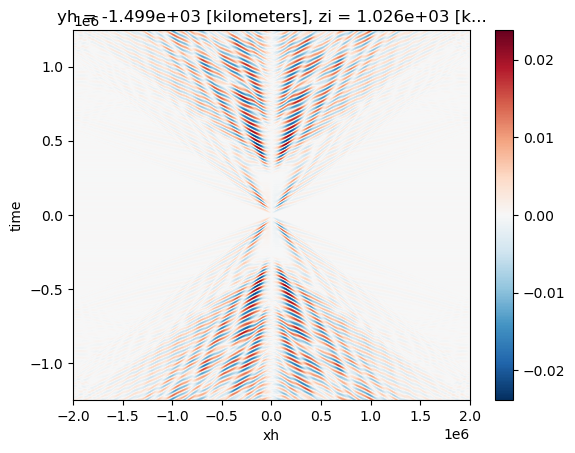

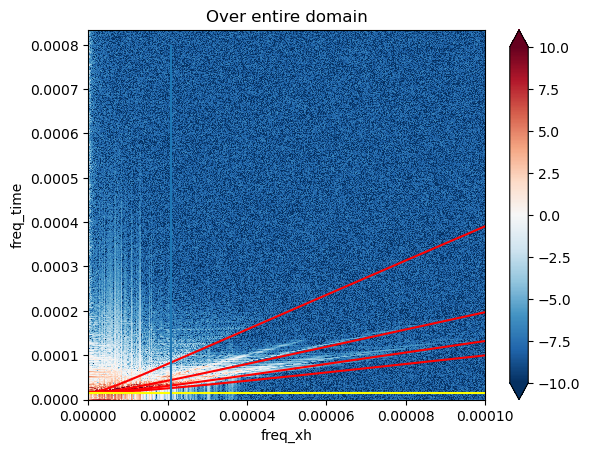

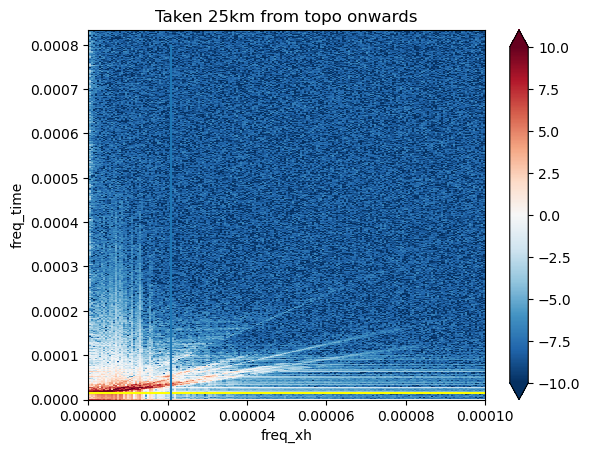

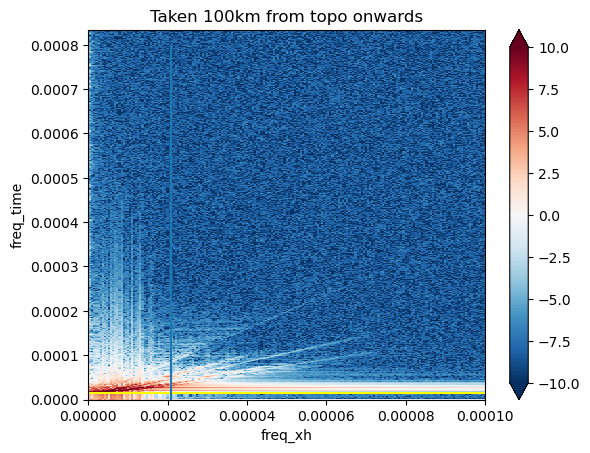

In [3]:
name = "height"
val = 450
expt = f"june_{name}_ridge_5layer/june_{name}_ridge_5layer_{name}-{val}"
plot_espectrum(expt)

/home/149/ab8992/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


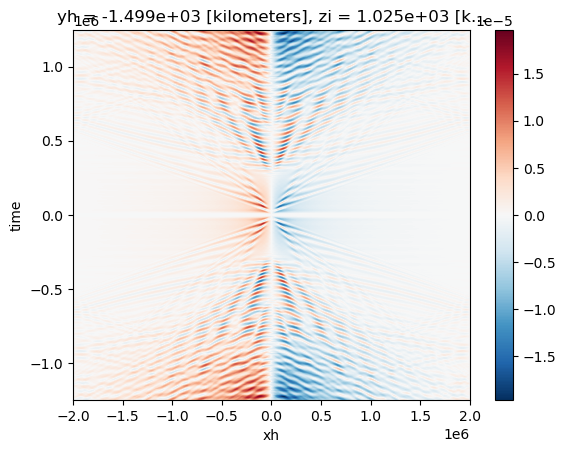

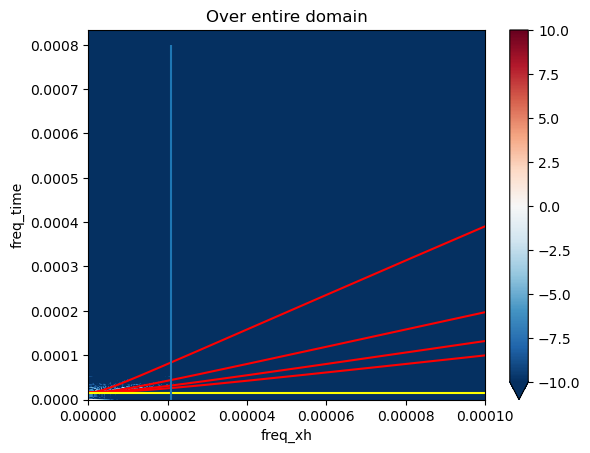

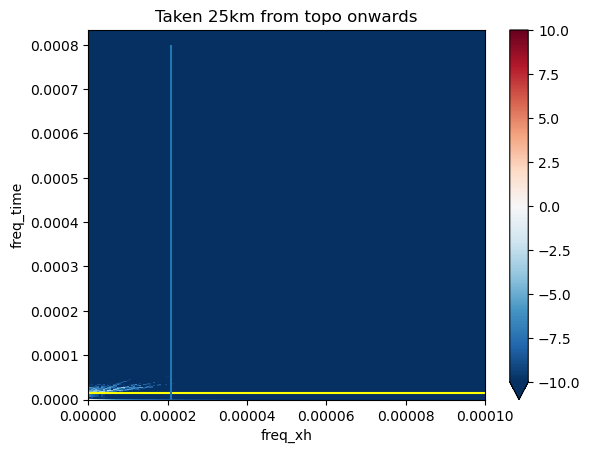

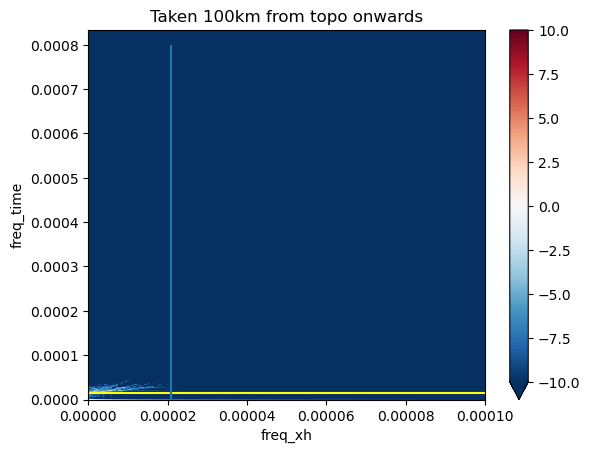

In [7]:
name = "height"
val = 450
expt = f"june_{name}_ridge_5layer/june_{name}_ridge_5layer_{name}-{val}"
plot_espectrum(expt,0)

/home/149/ab8992/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


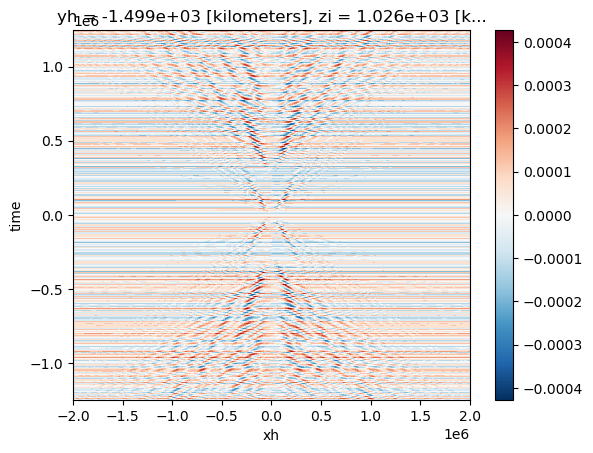

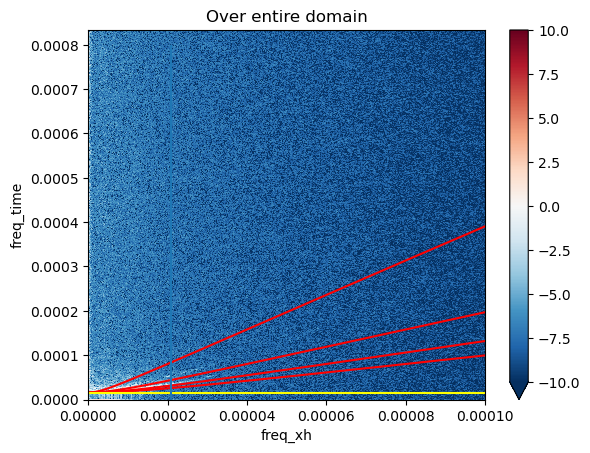

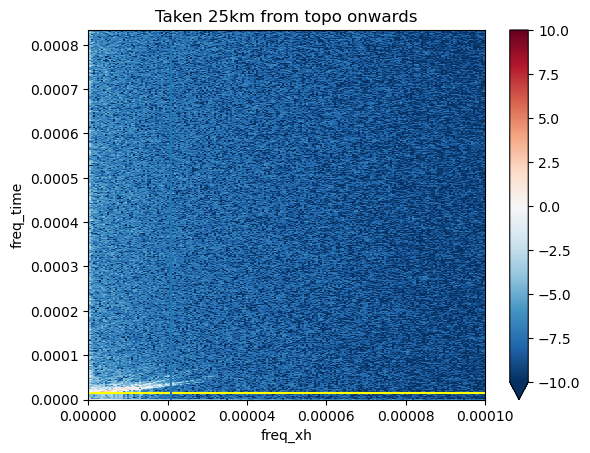

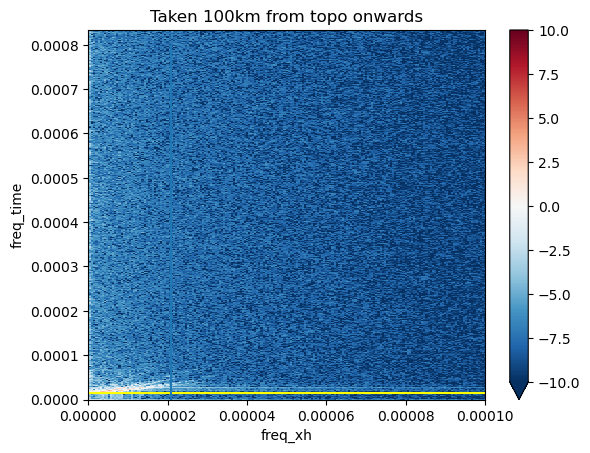

In [4]:
name = "height"
val = 10
expt = f"june_{name}_ridge_5layer/june_{name}_ridge_5layer_{name}-{val}"
plot_espectrum(expt)


/home/149/ab8992/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


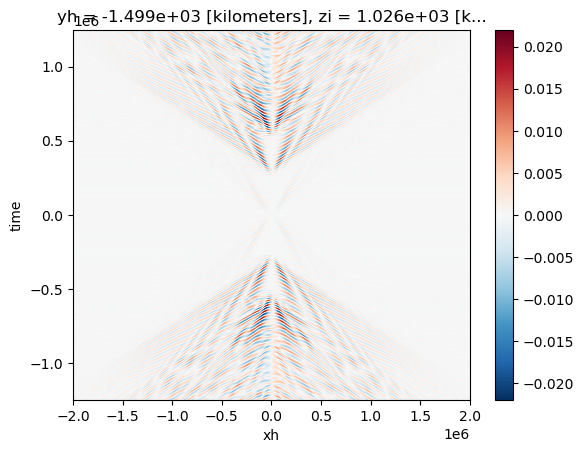

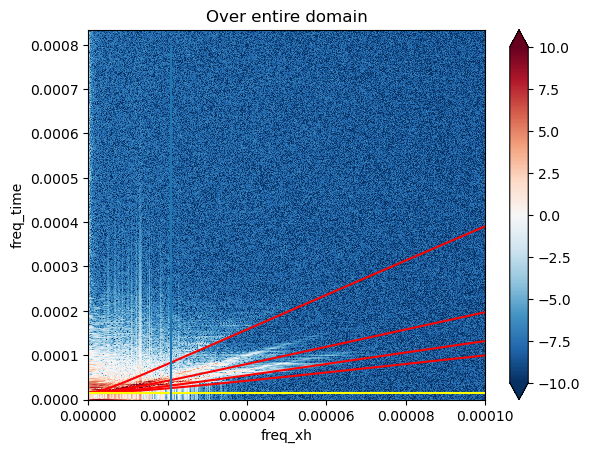

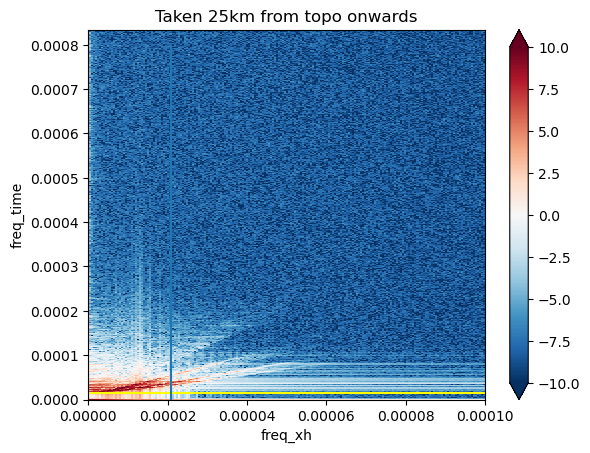

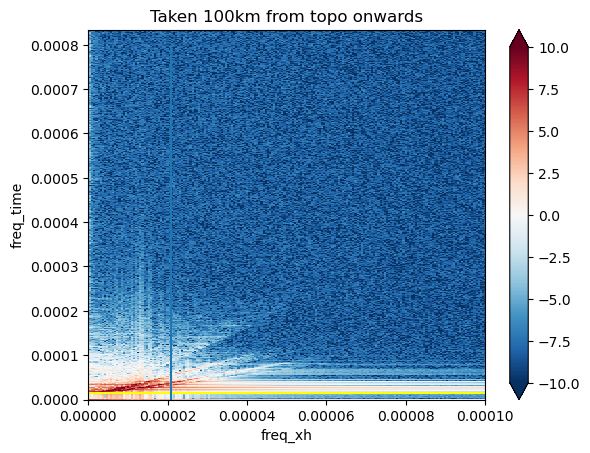

In [5]:
name = "forcing_latwidth"
val = 50
expt = f"june_{name}_ridge_5layer/june_{name}_ridge_5layer_{name}-{val}"
plot_espectrum(expt)